In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import cv2

import keras

from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,MaxPool2D,Dropout,Flatten,Conv2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

import os

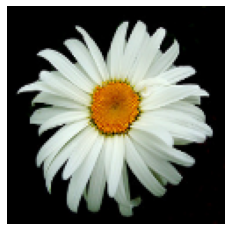

In [2]:
img = plt.imread("daisy/172882635_4cc7b86731_m.jpg")
img = cv2.resize(img,(124,124))
plt.imshow(img)
plt.axis("off")
plt.show()

In [3]:
x_ = list()
y = list()
IMG_SIZE = 128
for i in os.listdir("daisy"):
    try:
        path = "daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("dandelion"):
    try:
        path = "dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("rose"):
    try:
        path = "rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None
for i in os.listdir("sunflower"):
    try:
        path = "sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
    except:
        None
for i in os.listdir("tulip"):
    try:
        path = "tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
    except:
        None
x_ = np.array(x_)

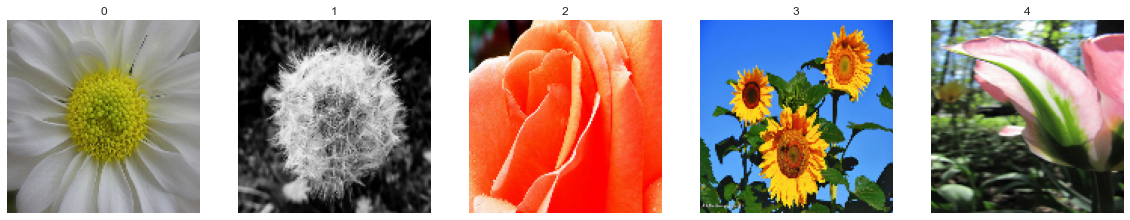

In [4]:
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_[951*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y[950*i])

In [5]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 5)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

In [7]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

In [8]:
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)

print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

print("x_val : ",x_val.shape)
print("y_val : ",y_val.shape)

x_train :  (3122, 128, 128, 3)
x_test :  (649, 128, 128, 3)
y_train :  (3122, 5)
y_test :  (649, 5)
x_val :  (552, 128, 128, 3)
y_val :  (552, 5)


In [9]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Flatten())


model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())


model.add(Dense(5,activation="softmax"))


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy']) 

In [10]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 128)      

In [12]:
train_datagen = ImageDataGenerator(
    rotation_range=60, 
    zoom_range = 0.1,
    width_shift_range=0.1, 
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
train_datagen.fit(x_train)

In [13]:
batch_size = 64
epoch=50

In [14]:
history = model.fit_generator(train_datagen.flow(x_train,y_train,batch_size=batch_size),
                              epochs= epoch,validation_data=(x_val,y_val),
                              steps_per_epoch=x_train.shape[0] // batch_size
                              )

Epoch 1/50
48/48 [==============================] - 113s 2s/step - loss: 1.6415 - accuracy: 0.4493 - val_loss: 5.3115 - val_accuracy: 0.3388
Epoch 2/50
48/48 [==============================] - 114s 2s/step - loss: 1.2624 - accuracy: 0.5389 - val_loss: 3.0048 - val_accuracy: 0.4638
Epoch 3/50
48/48 [==============================] - 126s 3s/step - loss: 1.1031 - accuracy: 0.5827 - val_loss: 1.6670 - val_accuracy: 0.5707
Epoch 4/50
48/48 [==============================] - 133s 3s/step - loss: 1.0383 - accuracy: 0.6131 - val_loss: 1.5038 - val_accuracy: 0.5308
Epoch 5/50
48/48 [==============================] - 123s 3s/step - loss: 0.9731 - accuracy: 0.6429 - val_loss: 1.2844 - val_accuracy: 0.6123
Epoch 6/50
48/48 [==============================] - 126s 3s/step - loss: 0.8818 - accuracy: 0.6663 - val_loss: 1.2340 - val_accuracy: 0.5996
Epoch 7/50
48/48 [==============================] - 122s 3s/step - loss: 0.8669 - accuracy: 0.6781 - val_loss: 0.9331 - val_accuracy: 0.6594
Epoch 8/50
48

In [15]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100))

649/649 [==============================] - 5s 8ms/step
Test Accuracy: 79.51%


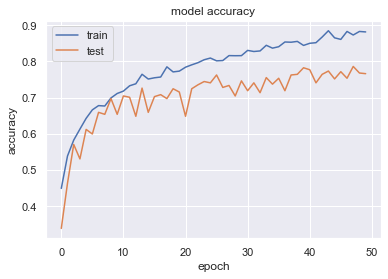

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


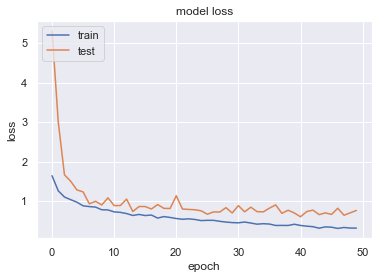

In [35]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

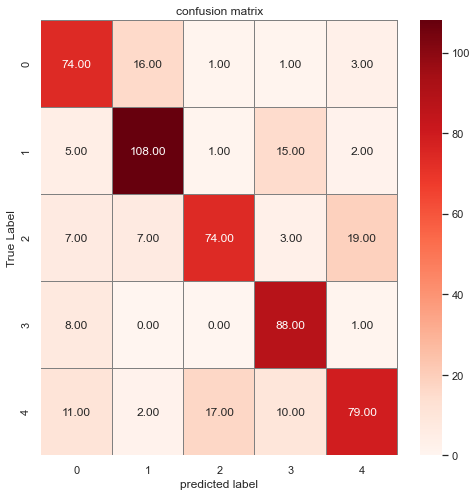

In [21]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()